In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results

In [3]:
plt.rc('font', size=12)

# MP162-MP167

In [20]:
MP134 = get_results("MP134")
MP135 = get_results("MP135")
MP136 = get_results("MP136")
MP162 = get_results("MP162")
MP163 = get_results("MP163")
MP164 = get_results("MP164")
MP165 = get_results("MP165")
MP166 = get_results("MP166")
MP167 = get_results("MP167")

# SAC training with models from MP162-MP164
MP244 = get_results("MP244")
MP245 = get_results("MP245")
MP246 = get_results("MP246")

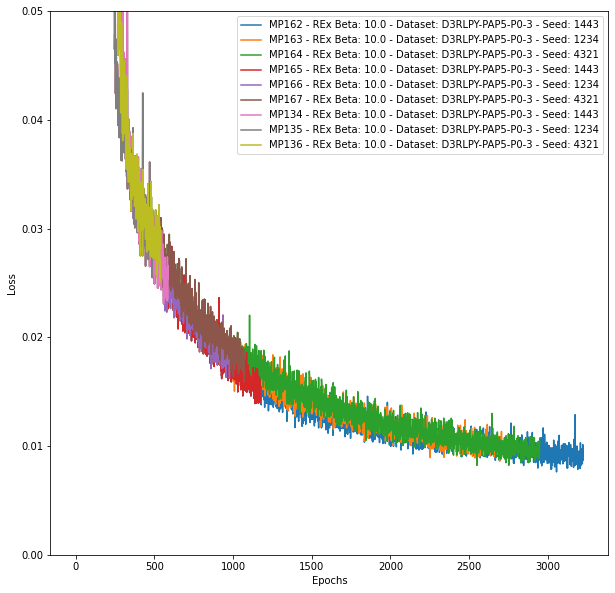

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP162,
    MP163,
    MP164,
    MP165,
    MP166,
    MP167,
    MP134,
    MP135,
    MP136,
]:
    ax.plot(exp.dynamics.model_loss_history.mean(axis=1), label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_ylim(0,0.05)
ax.legend()
pass

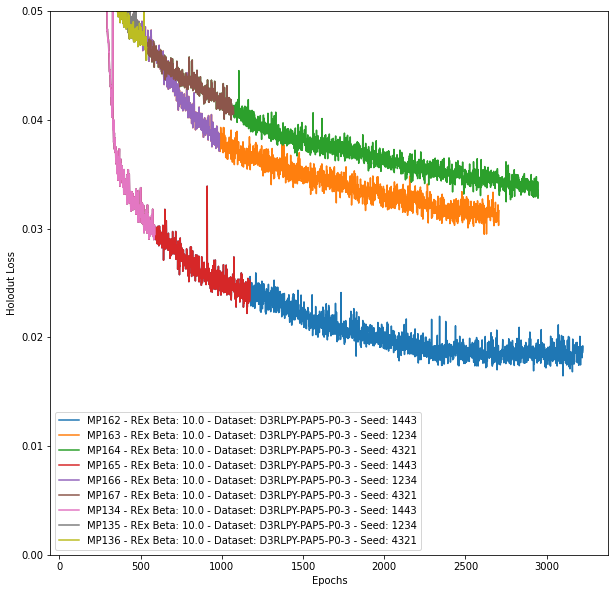

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP162,
    MP163,
    MP164,
    MP165,
    MP166,
    MP167,
    MP134,
    MP135,
    MP136,
]:
    ax.plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holodut Loss')
ax.set_ylim(0,0.05)
ax.legend()
pass

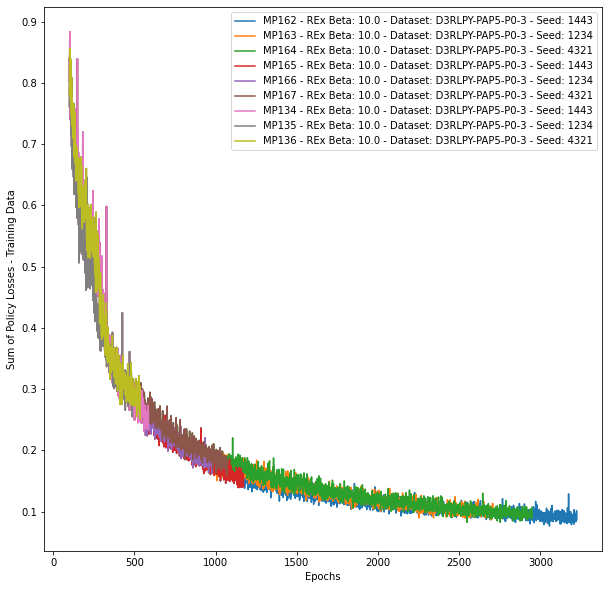

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP162,
    MP163,
    MP164,
    MP165,
    MP166,
    MP167,
    MP134,
    MP135,
    MP136,
]:
    ax.plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum of Policy Losses - Training Data')
# ax.set_ylim(0,0.2)
ax.legend()
pass

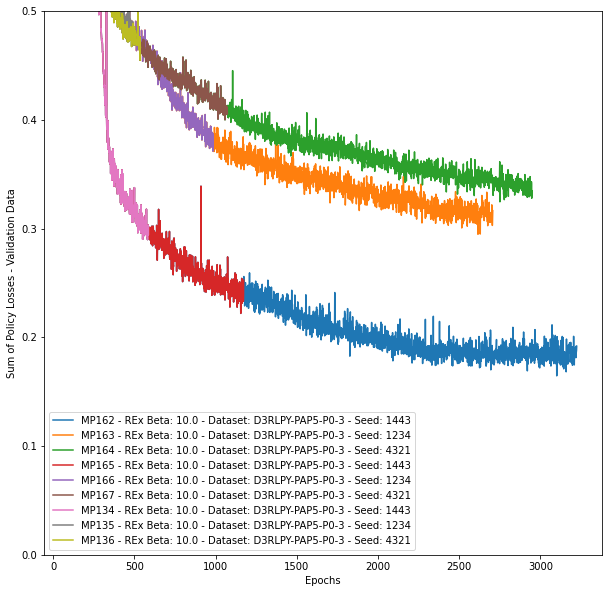

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP162,
    MP163,
    MP164,
    MP165,
    MP166,
    MP167,
    MP134,
    MP135,
    MP136,
]:
    ax.plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum of Policy Losses - Validation Data')
ax.set_ylim(0,0.5)
ax.legend()
pass

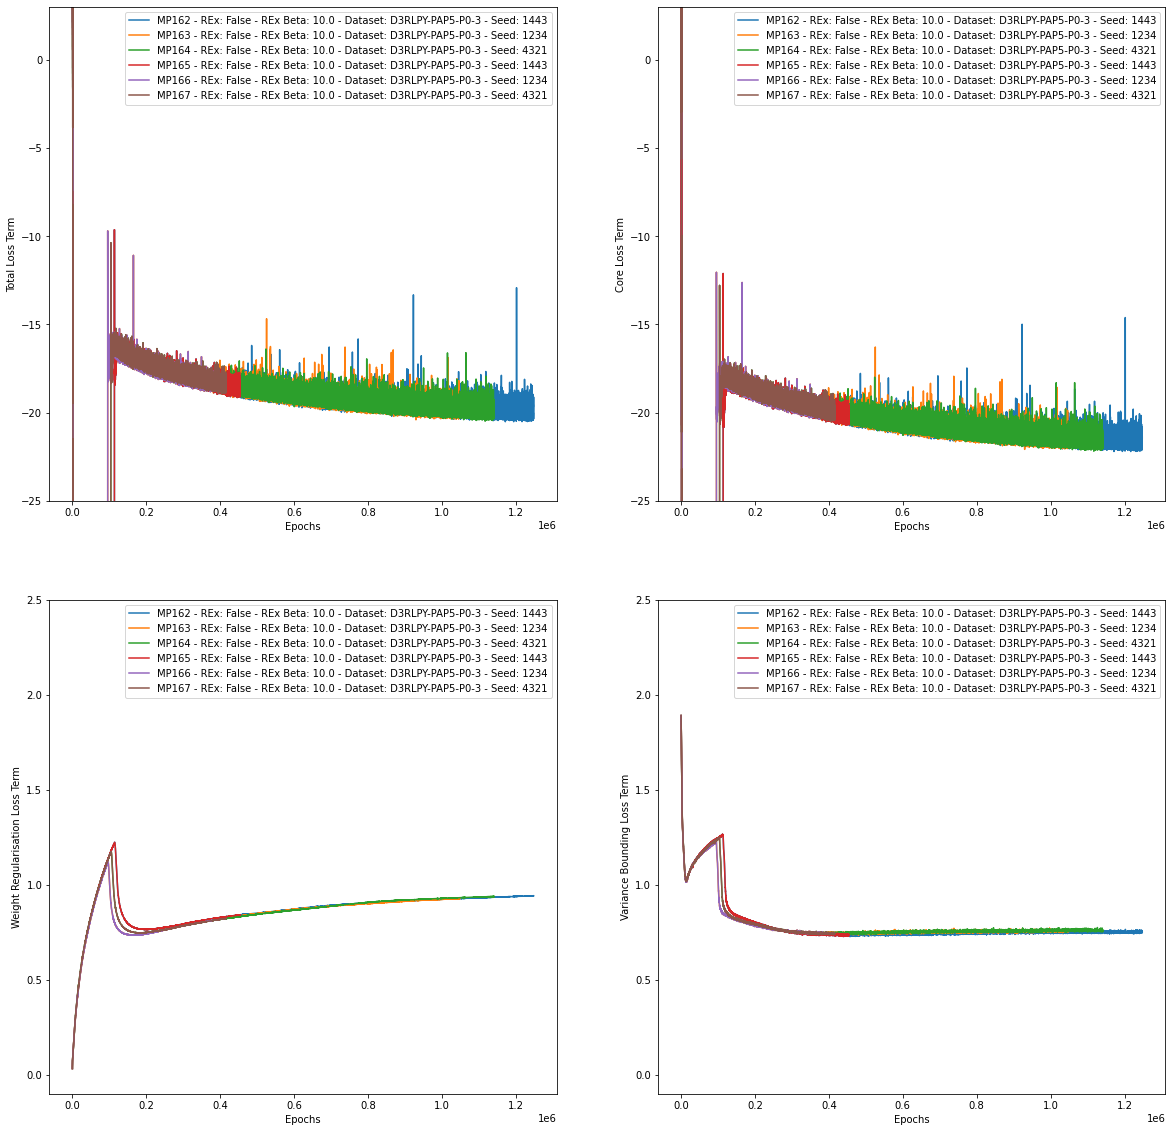

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP162,
    MP163,
    MP164,
    MP165,
    MP166,
    MP167,
    # MP134,
    # MP135,
    # MP136,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-0.1,2.5)
            ax[i,j].legend()
pass

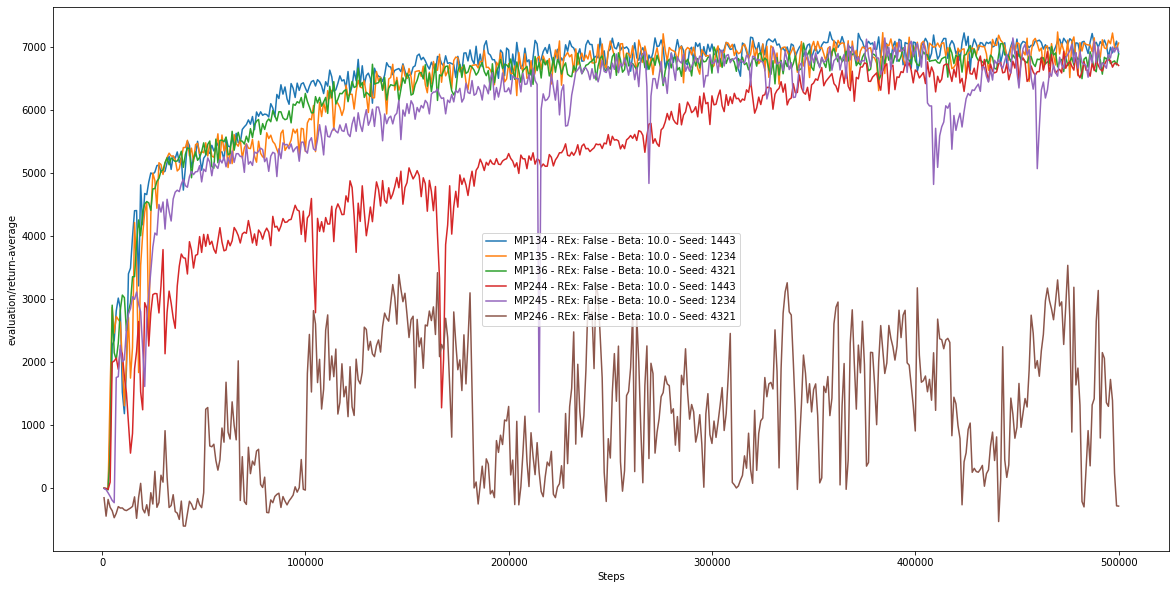

In [22]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP134,
    MP135,
    MP136,
    MP244,
    MP245,
    MP246,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Beta: {exp.rex_beta} - Seed: {exp.seed}', ls='--' if exp.rex else '-'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass